<a href="https://colab.research.google.com/github/eageremma/my_project1/blob/main/Hapiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
pip install pandas matplotlib seaborn

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/uk_wellbeing_full_dataset.csv")

print(df.head())
print(df.info())
print(df.describe())


          Region  Year  Life_satisfaction  Happiness  Anxiety  Worthwhile
0  Aberdeen City  2012               7.68       7.68     3.01        7.65
1  Aberdeen City  2013               7.52       7.52     2.56        7.55
2  Aberdeen City  2014               7.73       7.73     2.95        7.77
3  Aberdeen City  2015               7.58       7.58     2.76        7.66
4  Aberdeen City  2016               7.66       7.66     2.72        7.77
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             4598 non-null   object 
 1   Year               4598 non-null   int64  
 2   Life_satisfaction  4496 non-null   float64
 3   Happiness          4496 non-null   float64
 4   Anxiety            4496 non-null   float64
 5   Worthwhile         4496 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 215.7+ KB
No

In [5]:
# Ensuring correct dtypes
num_cols = ["Life_satisfaction", "Happiness", "Anxiety", "Worthwhile"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# drop rows with missing Year or Happiness
df = df.dropna(subset=["Year", "Happiness"])

# inspect unique regions
print(df["Region"].nunique(), "regions")
print(df["Region"].head())

print(df[num_cols].describe())



417 regions
0    Aberdeen City
1    Aberdeen City
2    Aberdeen City
3    Aberdeen City
4    Aberdeen City
Name: Region, dtype: object
       Life_satisfaction    Happiness      Anxiety   Worthwhile
count        4496.000000  4496.000000  4496.000000  4496.000000
mean            7.615919     7.615919     2.957169     7.831395
std             0.232385     0.232385     0.335022     0.203487
min             6.610000     6.610000     1.700000     6.810000
25%             7.470000     7.470000     2.750000     7.700000
50%             7.620000     7.620000     2.960000     7.830000
75%             7.762500     7.762500     3.170000     7.960000
max             8.590000     8.590000     4.290000     8.700000


Year
2012    7.455491
2013    7.497402
2014    7.560049
2015    7.661054
2016    7.693652
2017    7.721961
2018    7.732162
2019    7.756953
2020    7.700096
2021    7.422675
2022    7.572222
Name: Happiness, dtype: float64


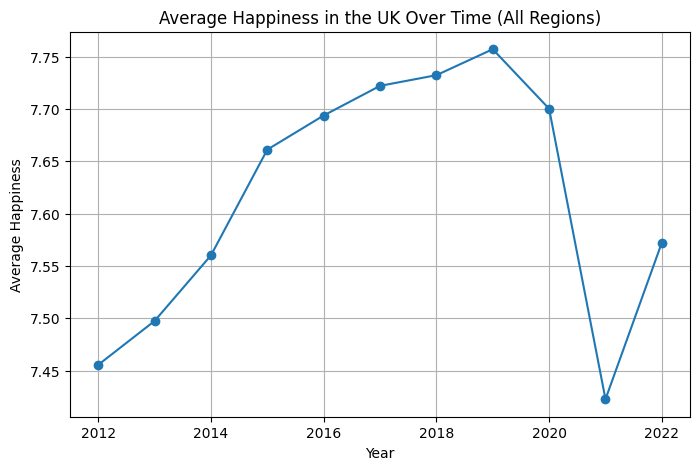

In [11]:
happiness_trend = df.groupby("Year")["Happiness"].mean()

print(happiness_trend)

plt.figure(figsize=(8, 5))
plt.plot(happiness_trend.index, happiness_trend.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Average Happiness")
plt.title("Average Happiness in the UK Over Time (All Regions)")
plt.grid(True)
plt.show()

Valid UK Regions' Happiness Scores:
Region
EAST OF ENGLAND             7.65
SOUTH EAST                  7.60
EAST MIDLANDS               7.57
YORKSHIRE AND THE HUMBER    7.56
ENGLAND                     7.55
SOUTH WEST                  7.55
UNITED KINGDOM              7.54
WEST MIDLANDS               7.51
NORTH WEST                  7.51
NORTH EAST                  7.50
WALES                       7.48
LONDON                      7.46
SCOTLAND                    7.45
Name: Happiness, dtype: float64


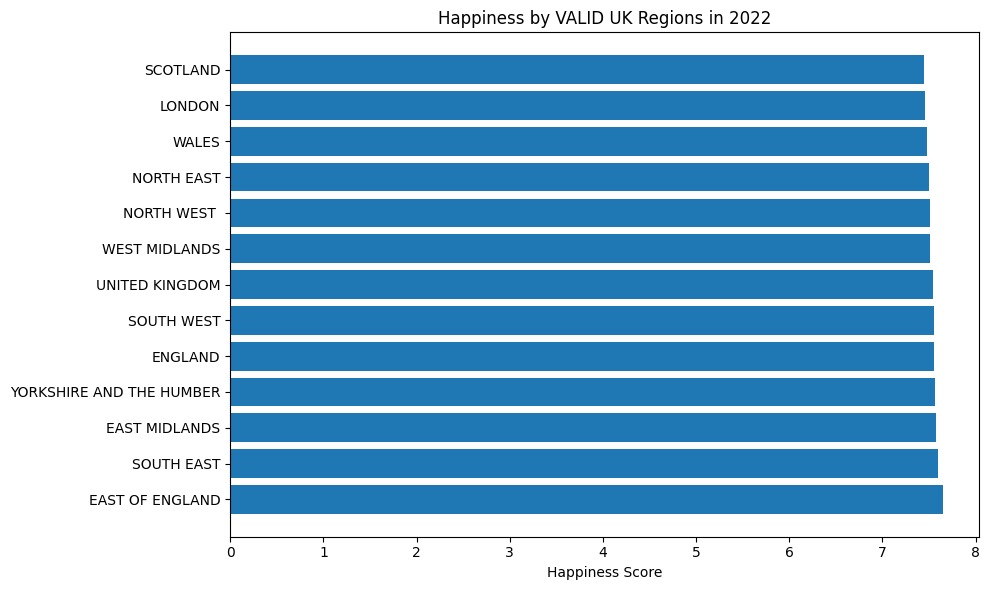


Happiest valid region: ('EAST OF ENGLAND', 7.65)
Least happy valid region: ('SCOTLAND', 7.45)


In [13]:

# Comparing only VALID UK regions in the latest year

# Valid UK regions (NUTS1 + UK countries)
valid_regions = [
    "UNITED KINGDOM",
    "ENGLAND",
    "SCOTLAND",
    "WALES",
    "NORTH EAST",
    "NORTH WEST",
    "YORKSHIRE AND THE HUMBER",
    "EAST MIDLANDS",
    "WEST MIDLANDS",
    "EAST",           # for East of England
    "LONDON",
    "SOUTH EAST",
    "SOUTH WEST",
]

# 2. Cleaning region column (ensure consistent text)
df["Region_clean"] = df["Region"].str.strip().str.upper()

# 3. Filter dataset to include ONLY valid UK regions
df_valid = df[df["Region_clean"].isin(valid_regions)].copy()

# Optional: rename "EAST" to "EAST OF ENGLAND" for clarity
df_valid.loc[df_valid["Region_clean"] == "EAST", "Region"] = "EAST OF ENGLAND"

# 4. Latest year only
latest_year = df_valid["Year"].max()
latest_valid = df_valid[df_valid["Year"] == latest_year]

# 5. Compute average happiness for valid regions
region_happiness_valid = (
    latest_valid.groupby("Region")["Happiness"]
                .mean()
                .sort_values(ascending=False)
)

print("Valid UK Regions' Happiness Scores:")
print(region_happiness_valid)

# 6. Visualize
plt.figure(figsize=(10, 6))
plt.barh(region_happiness_valid.index, region_happiness_valid.values)
plt.xlabel("Happiness Score")
plt.title(f"Happiness by VALID UK Regions in {latest_year}")
plt.tight_layout()
plt.show()

# 7. Happiest & least happy valid regions
happiest_valid = region_happiness_valid.idxmax(), region_happiness_valid.max()
least_happy_valid = region_happiness_valid.idxmin(), region_happiness_valid.min()

print("\nHappiest valid region:", happiest_valid)
print("Least happy valid region:", least_happy_valid)



Happiness scores across districts/local areas:
Region
High Peak            8.34
Torridge             8.25
Richmondshire        8.16
Blaby                8.10
Hambleton            8.09
                     ... 
Melton               7.03
City of London        NaN
Gravesham             NaN
Oadby and Wigston     NaN
Orkney Islands        NaN
Name: Happiness, Length: 405, dtype: float64


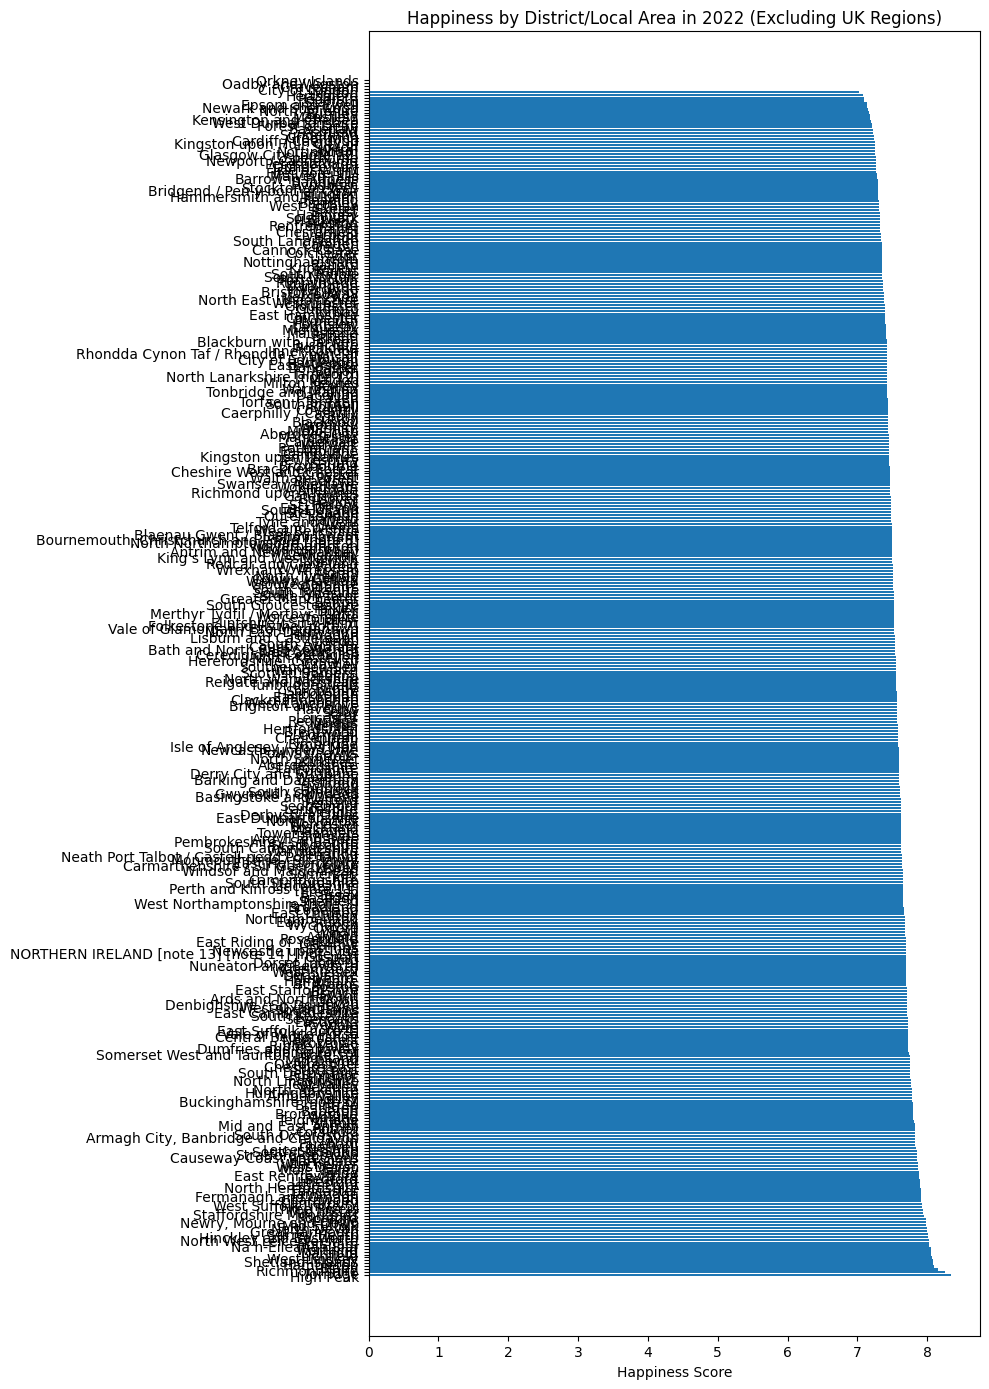


Highest happiness district: ('High Peak', 8.34)
Lowest happiness district: ('Melton', 7.03)


In [14]:
# Compare Happiness among districts/local areas
# excluding valid UK regions

# 1. List of valid UK regions to EXCLUDE
valid_regions = [
    "UNITED KINGDOM",
    "ENGLAND",
    "SCOTLAND",
    "WALES",
    "NORTH EAST",
    "NORTH WEST",
    "YORKSHIRE AND THE HUMBER",
    "EAST MIDLANDS",
    "WEST MIDLANDS",
    "EAST",           # East of England in your dataset
    "LONDON",
    "SOUTH EAST",
    "SOUTH WEST",
]

# 2. Clean region names to uppercase for comparison
df["Region_clean"] = df["Region"].str.strip().str.upper()

# 3. Filter OUT valid NUTS1 regions → KEEP districts/local authorities
df_districts = df[~df["Region_clean"].isin(valid_regions)].copy()

# 4. Get latest year
latest_year = df_districts["Year"].max()
latest_districts = df_districts[df_districts["Year"] == latest_year]

# 5. Compute average Happiness for each district/local area
district_happiness = (
    latest_districts.groupby("Region")["Happiness"]
                    .mean()
                    .sort_values(ascending=False)
)

print("Happiness scores across districts/local areas:")
print(district_happiness)

# 6. Plot
plt.figure(figsize=(10, 14))
plt.barh(district_happiness.index, district_happiness.values)
plt.xlabel("Happiness Score")
plt.title(f"Happiness by District/Local Area in {latest_year} (Excluding UK Regions)")
plt.tight_layout()
plt.show()

# 7. Identify highest & lowest district happiness
top_district = (district_happiness.idxmax(), district_happiness.max())
bottom_district = (district_happiness.idxmin(), district_happiness.min())

print("\nHighest happiness district:", top_district)
print("Lowest happiness district:", bottom_district)


Top 10 happiest districts in 2022
Region
High Peak           8.34
Torridge            8.25
Richmondshire       8.16
Blaby               8.10
Hambleton           8.09
Shetland Islands    8.09
West Lindsey        8.07
Lichfield           8.06
Dartford            8.05
Worthing            8.05
Name: Happiness, dtype: float64

Bottom 10 happiest districts in 2022
Region
Newark and Sherwood    7.14
Epsom and Ewell        7.14
Stafford               7.10
Redditch               7.09
Hertsmere              7.08
Melton                 7.03
City of London          NaN
Gravesham               NaN
Oadby and Wigston       NaN
Orkney Islands          NaN
Name: Happiness, dtype: float64


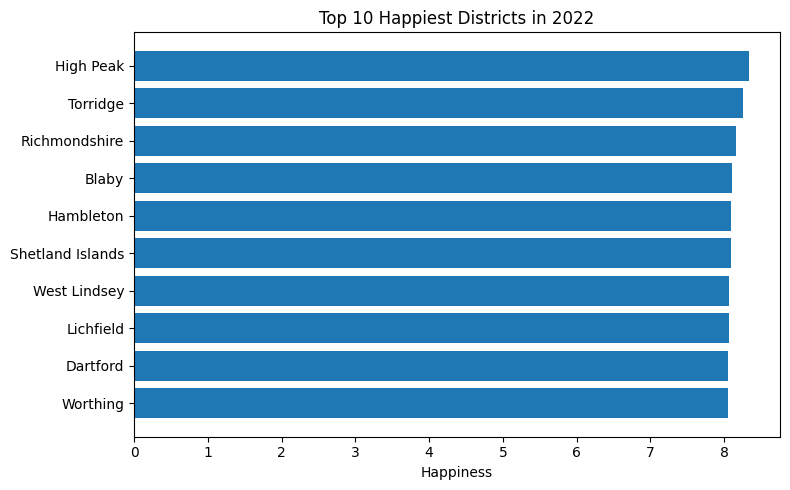

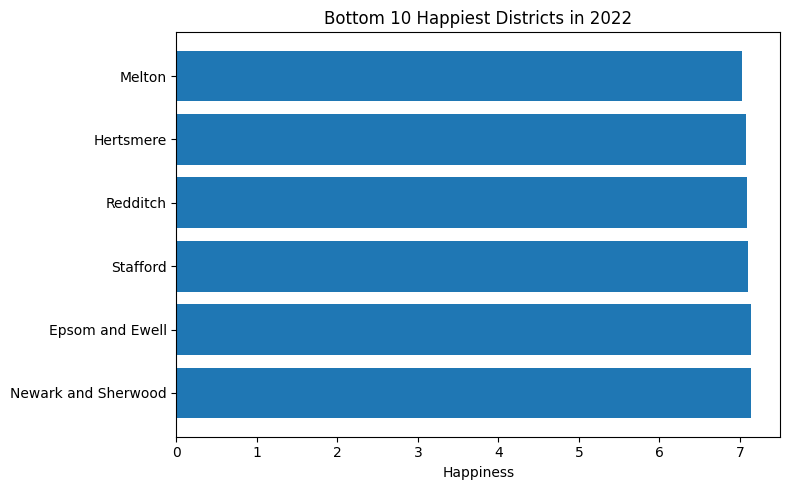

In [15]:
# latest year in the dataset
latest_year = df_districts["Year"].max()
latest_dist = df_districts[df_districts["Year"] == latest_year]

# average happiness per district
district_happiness = (
    latest_dist.groupby("Region")["Happiness"]
               .mean()
               .sort_values(ascending=False)
)

top10 = district_happiness.head(10)
bottom10 = district_happiness.tail(10)

print("Top 10 happiest districts in", latest_year)
print(top10)
print("\nBottom 10 happiest districts in", latest_year)
print(bottom10)

# plot top 10
plt.figure(figsize=(8, 5))
plt.barh(top10.index, top10.values)
plt.gca().invert_yaxis()
plt.xlabel("Happiness")
plt.title(f"Top 10 Happiest Districts in {latest_year}")
plt.tight_layout()
plt.show()

# plot bottom 10
plt.figure(figsize=(8, 5))
plt.barh(bottom10.index, bottom10.values)
plt.xlabel("Happiness")
plt.title(f"Bottom 10 Happiest Districts in {latest_year}")
plt.tight_layout()
plt.show()


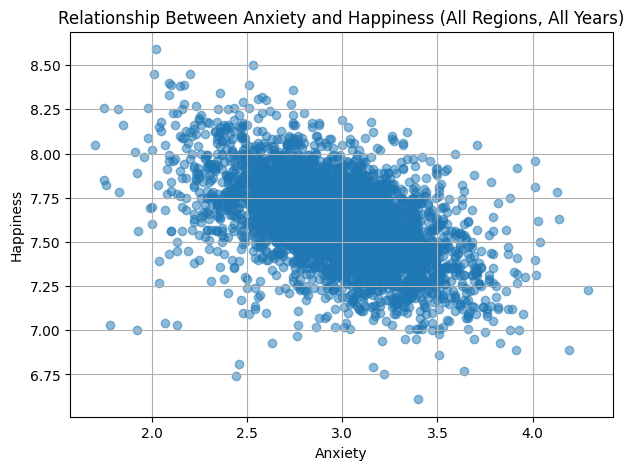

Correlation (Happiness vs Anxiety): -0.5230574421497602
                   Life_satisfaction  Happiness  Worthwhile   Anxiety
Life_satisfaction           1.000000   1.000000    0.820718 -0.523057
Happiness                   1.000000   1.000000    0.820718 -0.523057
Worthwhile                  0.820718   0.820718    1.000000 -0.444213
Anxiety                    -0.523057  -0.523057   -0.444213  1.000000


In [22]:
plt.figure(figsize=(7, 5))
plt.scatter(df["Anxiety"], df["Happiness"], alpha=0.5)
plt.xlabel("Anxiety")
plt.ylabel("Happiness")
plt.title("Relationship Between Anxiety and Happiness (All Regions, All Years)")
plt.grid(True)
plt.show()

# Correlation
corr_ha = df["Happiness"].corr(df["Anxiety"])
print("Correlation (Happiness vs Anxiety):", corr_ha)

corr = df[["Life_satisfaction", "Happiness", "Worthwhile", "Anxiety"]].corr()
print(corr)


Top 10 districts with strongest positive happiness trend:
Region
Torridge                0.071727
Wolverhampton           0.069727
Castle Point            0.059818
Dartford                0.058818
Pendle                  0.058000
High Peak               0.055455
Great Yarmouth          0.054455
Croydon                 0.054091
Chorley                 0.049909
Barking and Dagenham    0.048182
dtype: float64

Top 10 districts with strongest negative happiness trend:
Region
Newry, Mourne and Down            NaN
North Northamptonshire [note 2]   NaN
Oadby and Wigston                 NaN
Orkney Islands                    NaN
Outer London                      NaN
Richmondshire                     NaN
South Yorkshire                   NaN
Tyne and Wear                     NaN
West Northamptonshire [note 3]    NaN
West Yorkshire                    NaN
dtype: float64


/tmp/ipython-input-831788158.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_slope)


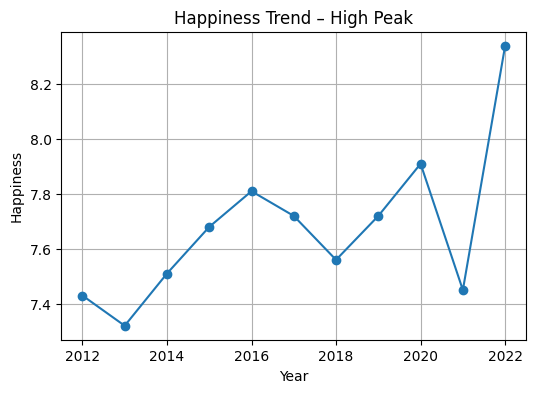

In [18]:
district_year = (
    df_districts.groupby(["Region", "Year"])["Happiness"]
                .mean()
                .reset_index()
)
district_year.head()

import numpy as np

def compute_slope(group):
    x = group["Year"].values
    y = group["Happiness"].values
    if len(np.unique(x)) < 2:
        return np.nan  # not enough years
    slope, intercept = np.polyfit(x, y, 1)
    return slope

slopes = (
    district_year.groupby("Region")
                 .apply(compute_slope)
                 .sort_values(ascending=False)
)

print("Top 10 districts with strongest positive happiness trend:")
print(slopes.head(10))

print("\nTop 10 districts with strongest negative happiness trend:")
print(slopes.tail(10))

district_name = "High Peak"   # change to any district you want

subset = district_year[district_year["Region"] == district_name]

plt.figure(figsize=(6, 4))
plt.plot(subset["Year"], subset["Happiness"], marker="o")
plt.xlabel("Year")
plt.ylabel("Happiness")
plt.title(f"Happiness Trend – {district_name}")
plt.grid(True)
plt.show()
